# TEAM ID = 1066

# PRCL-0017-TEL-CHRUN Customer churn prediction

# Business Case:
<font color=red>No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business. Due to new players in the market, telecom industry has become very competitive and retaining customers becoming a challenge.
In spite of No-Churn initiatives of reducing tariffs and promoting more offers, the churn rate ( percentage of customers migrating to competitors) is well above 10%. No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry.</font>

# PROJECT GOAL
<font color=blue>Help No-Churn with their use cases with ML

1. Understanding the variables that are influencing the customers to migrate.

2. Creating Churn risk scores that can be indicative to drive retention campaigns.

3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.

4. Exporting the trained model with prediction capability for churn flag highlights the flag(with input variables doucments) that can be integration with internal application

help to identify possible CHURN-FLAG YES customers and provide more attention in customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.,</font>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sqlalchemy import create_engine
import pymysql

In [3]:
db_host = '18.136.157.135'
username = 'dm_team3'
user_pass = 'DM!$!Team!27@9!20&'
db_name = 'project_telecom'

conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()

['telecom_churn_data']

In [4]:
query = "select * from telecom_churn_data"
data = pd.read_sql(query,conn)
print(data.shape)
data

(4617, 21)


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [5]:
data1 = data.rename(columns={"columns1": "State", "columns2": "Account","columns3": "Area_Code", "columns4": "Phone","columns5": "International_Plan", 
                       
                       "columns6": "VMail_Plan","columns7": "VMail_Message", "columns8": "Day_Mins","columns9": "Day_Calls", "columns10": "Day_Charge",
                       
                      "columns11": "Eve_Mins", "columns12": "Eve_Calls","columns13": "Eve_Charge", "columns14": "Night_Mins","columns15": "Night_Calls", 
                       
                       "columns16": "Night_Charge","columns17": "International_Mins", "columns18": "International_calls","columns19": "International_Charge",
                       
                      "columns20": "CustServ_Calls", "columns21": "Churn"})

data1.head(3)

,State,Account,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.


In [6]:
data1.iloc[:,[10]]

,Eve_Mins
0,197.4
1,195.5
2,121.2
3,61.9
4,148.3
...,...
4612,187.2
4613,303.1
4614,296.1
4615,226.3


In [7]:
data1.to_csv('telecom_churn_data.csv') 

In [8]:
data1.Account.nunique()

218

In [9]:
data1.describe()

,State,Account,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,...,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,...,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,402-2728,no,no,0,189.3,102,32.18,...,105,14.25,194.3,105,9.66,9.8,3,2.65,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,...,111,15,10,115,19,81,925,81,1651,3961


In [10]:
data1.shape

(4617, 21)

In [11]:
data1.isnull().sum()

State                   0
Account                 0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [12]:
data2 = pd.read_csv('telecom_churn_data.csv')
data2.head()

,Unnamed: 0,State,Account,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [13]:
data2.drop(['Unnamed: 0'],inplace=True,axis=1)
print(data2.head())

  State  Account  Area_Code      Phone International_Plan VMail_Plan  \
0    KS      128        415   382-4657                 no        yes   
1    OH      107        415   371-7191                 no        yes   
2    NJ      137        415   358-1921                 no         no   
3    OH       84        408   375-9999                yes         no   
4    OK       75        415   330-6626                yes         no   

   VMail_Message  Day_Mins  Day_Calls  Day_Charge  ...  Eve_Calls  Eve_Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0       244.7   

In [14]:
data2.describe()

,Account,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [15]:
datacorr = data2.corr()
datacorr

,Account,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
Account,1.000000,-0.020394,-0.012983,0.002002,0.032783,0.001999,-0.006778,0.015598,-0.006775,-0.002077,-0.009482,-0.002095,0.003483,0.023485,0.003501,0.002620
Area_Code,-0.020394,1.000000,-0.002597,-0.018900,-0.013179,-0.018903,0.011513,-0.011528,0.011533,0.002794,0.015316,0.002782,-0.007292,-0.011531,-0.007386,0.021046
VMail_Message,-0.012983,-0.002597,1.000000,0.009028,-0.003846,0.009025,0.017872,-0.006508,0.017878,0.004672,0.000889,0.004665,0.005167,0.007423,0.005202,-0.006951
Day_Mins,0.002002,-0.018900,0.009028,1.000000,-0.002823,1.000000,-0.010260,0.012990,-0.010268,0.009604,0.005165,0.009591,-0.012314,0.000166,-0.012261,-0.008149
Day_Calls,0.032783,-0.013179,-0.003846,-0.002823,1.000000,-0.002821,-0.006430,0.003923,-0.006429,0.010730,-0.013299,0.010724,0.012951,0.010889,0.013055,-0.008747
Day_Charge,0.001999,-0.018903,0.009025,1.000000,-0.002821,1.000000,-0.010255,0.012992,-0.010262,0.009606,0.005164,0.009593,-0.012315,0.000163,-0.012262,-0.008155
Eve_Mins,-0.006778,0.011513,0.017872,-0.010260,-0.006430,-0.010255,1.000000,0.001135,1.000000,-0.018830,0.014226,-0.018837,0.000165,0.005749,0.000172,-0.015598
Eve_Calls,0.015598,-0.011528,-0.006508,0.012990,0.003923,0.012992,0.001135,1.000000,0.001151,0.002610,-0.015463,0.002624,-0.002798,0.005198,-0.002831,0.007730
Eve_Charge,-0.006775,0.011533,0.017878,-0.010268,-0.006429,-0.010262,1.000000,0.001151,1.000000,-0.018839,0.014231,-0.018846,0.000163,0.005751,0.000170,-0.015611
Night_Mins,-0.002077,0.002794,0.004672,0.009604,0.010730,0.009606,-0.018830,0.002610,-0.018839,1.000000,0.025742,0.999999,-0.004549,-0.014651,-0.004500,-0.013871


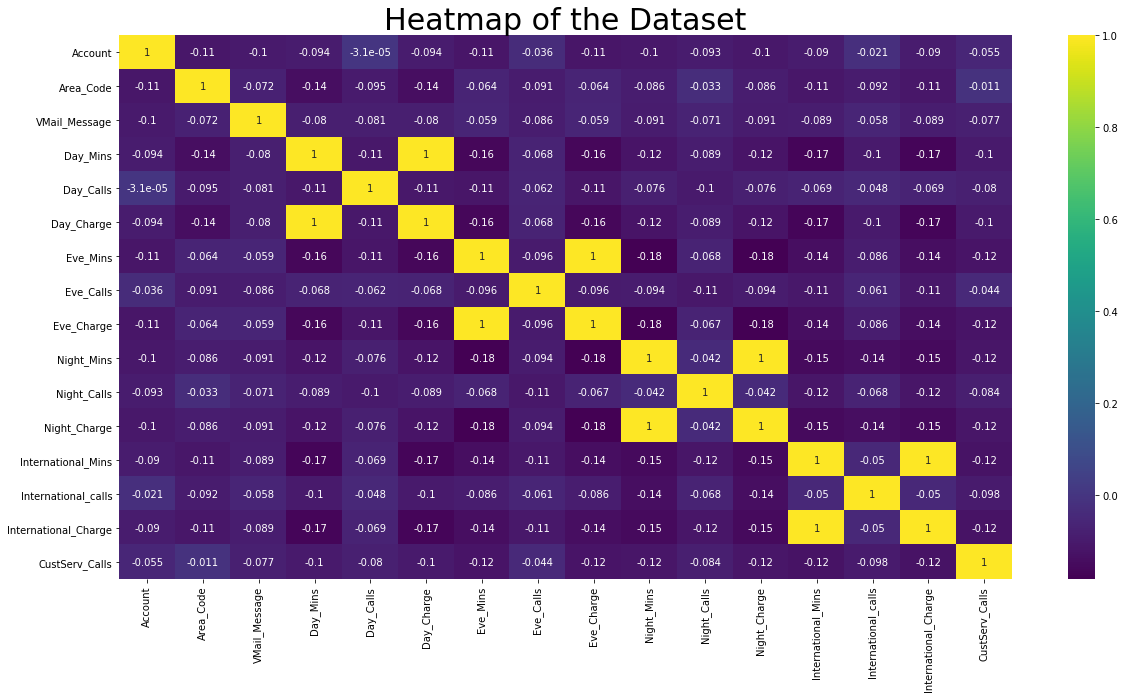

In [16]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(datacorr.corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

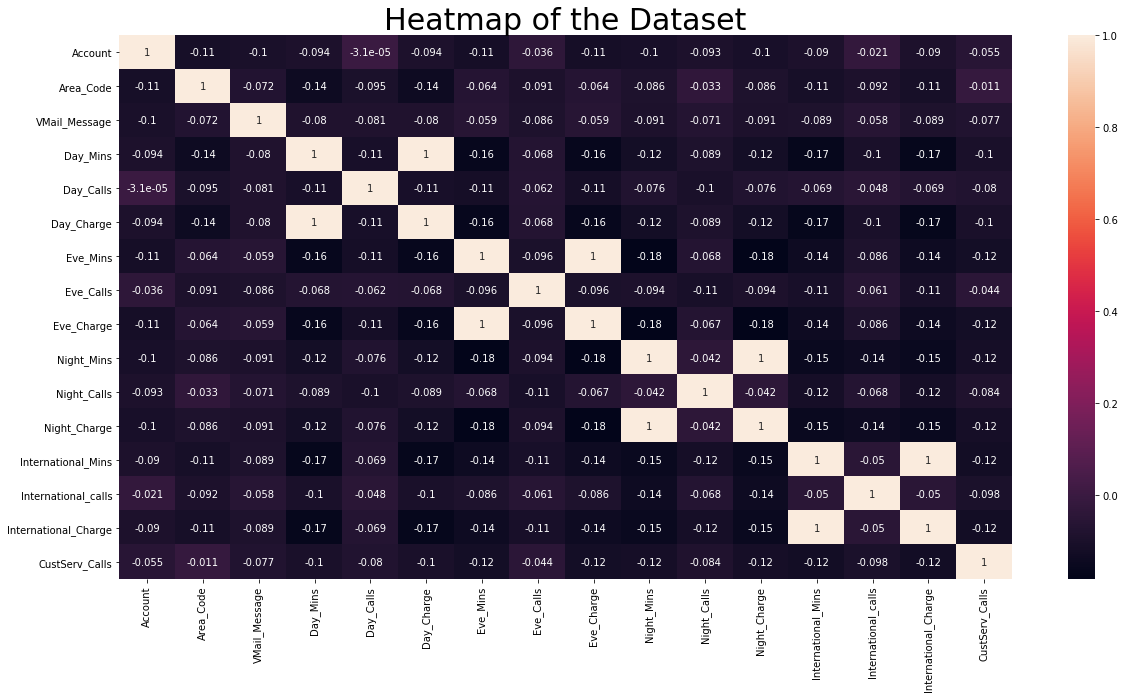

In [17]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(datacorr.corr(), annot = True)
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

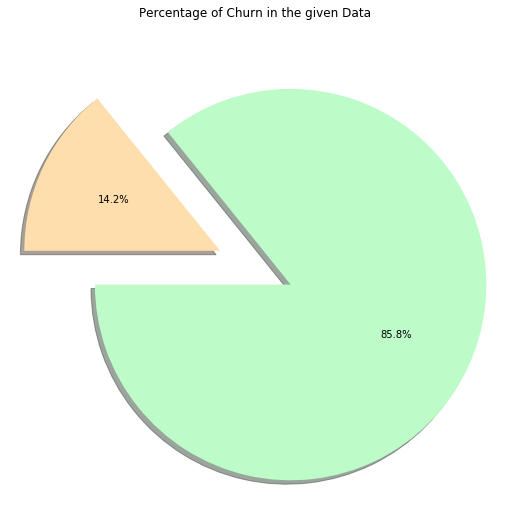

In [18]:
data = data1['Churn'].value_counts(sort = True)
chroma = ["#BDFCC9","#FFDEAD"]
rcParams['figure.figsize'] = 9,9
explode = [0.2,0.2]
plt.pie(data, explode=explode, colors=chroma, autopct='%1.1f%%', shadow=True, startangle=180,)
plt.title('Percentage of Churn in the given Data')
plt.show()

Text(0.5, 1.0, 'Count of Churn in the given Data')

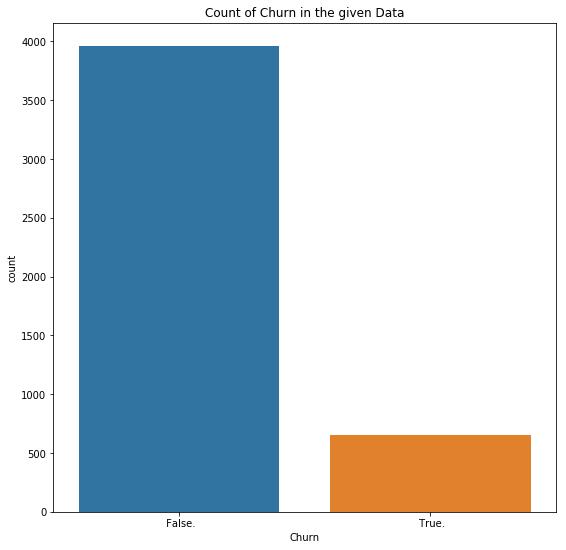

In [19]:
sns.countplot(data2.Churn)
plt.title('Count of Churn in the given Data')

Text(0.5, 1.0, 'Count of International plan in the given Data')

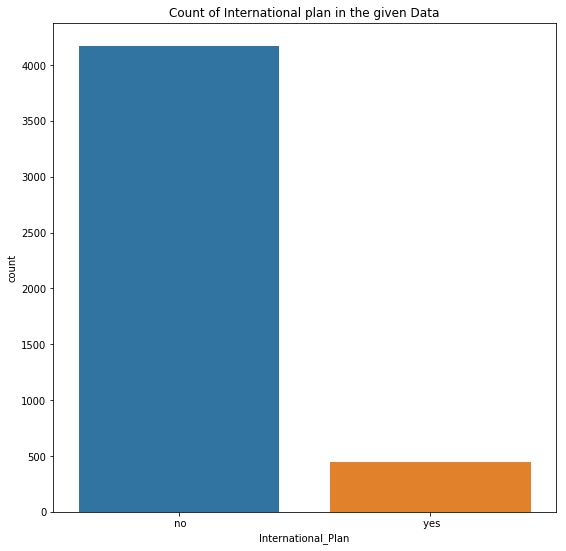

In [20]:
sns.countplot(data1.International_Plan)
plt.title('Count of International plan in the given Data')

Text(0.5, 1.0, 'Count of Voice Mail Plan in the given Data')

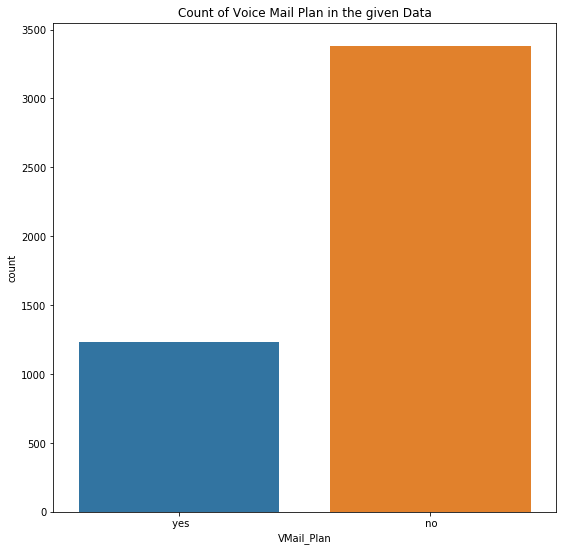

In [21]:
sns.countplot(data1.VMail_Plan)
plt.title('Count of Voice Mail Plan in the given Data')

In [22]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data2.Churn = enc.fit_transform(data2.Churn)
data2.International_Plan = enc.fit_transform(data2.International_Plan)
data2.VMail_Plan = enc.fit_transform(data2.VMail_Plan)
#data1.State = enc.fit_transform(data1.State)
data2.head(5)

,State,Account,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Text(0.5, 1.0, 'Count of Voice Mail Message in the given Data')

<Figure size 4320x5040 with 0 Axes>

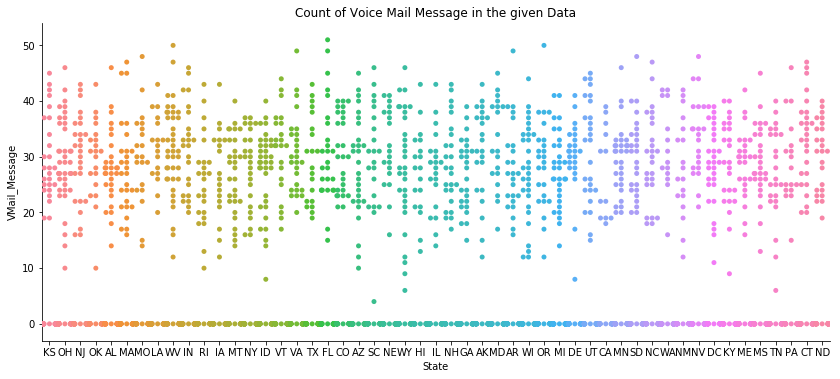

In [23]:
plt.figure(figsize=(60,70))

sns.catplot(x="State",y="VMail_Message", kind="swarm", data=data2, aspect=30.7/13.27)
plt.title('Count of Voice Mail Message in the given Data')


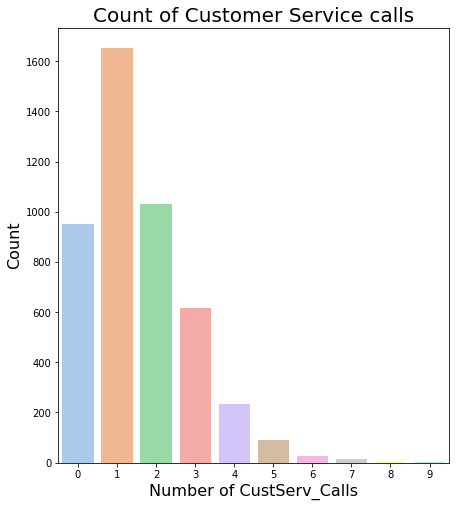

In [24]:
plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'CustServ_Calls', data = data2, palette = 'pastel')
ax.set_title(label = 'Count of Customer Service calls', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of CustServ_Calls', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

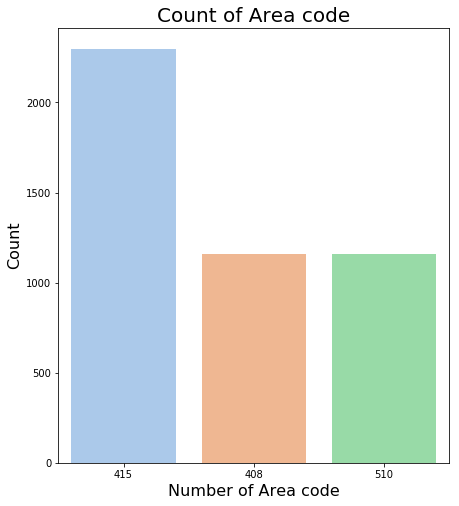

In [25]:
plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'Area_Code', data = data1, palette = 'pastel')
ax.set_title(label = 'Count of Area code', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Area code', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

In [26]:
data2.head(3)

,State,Account,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text yticklabel objects>)

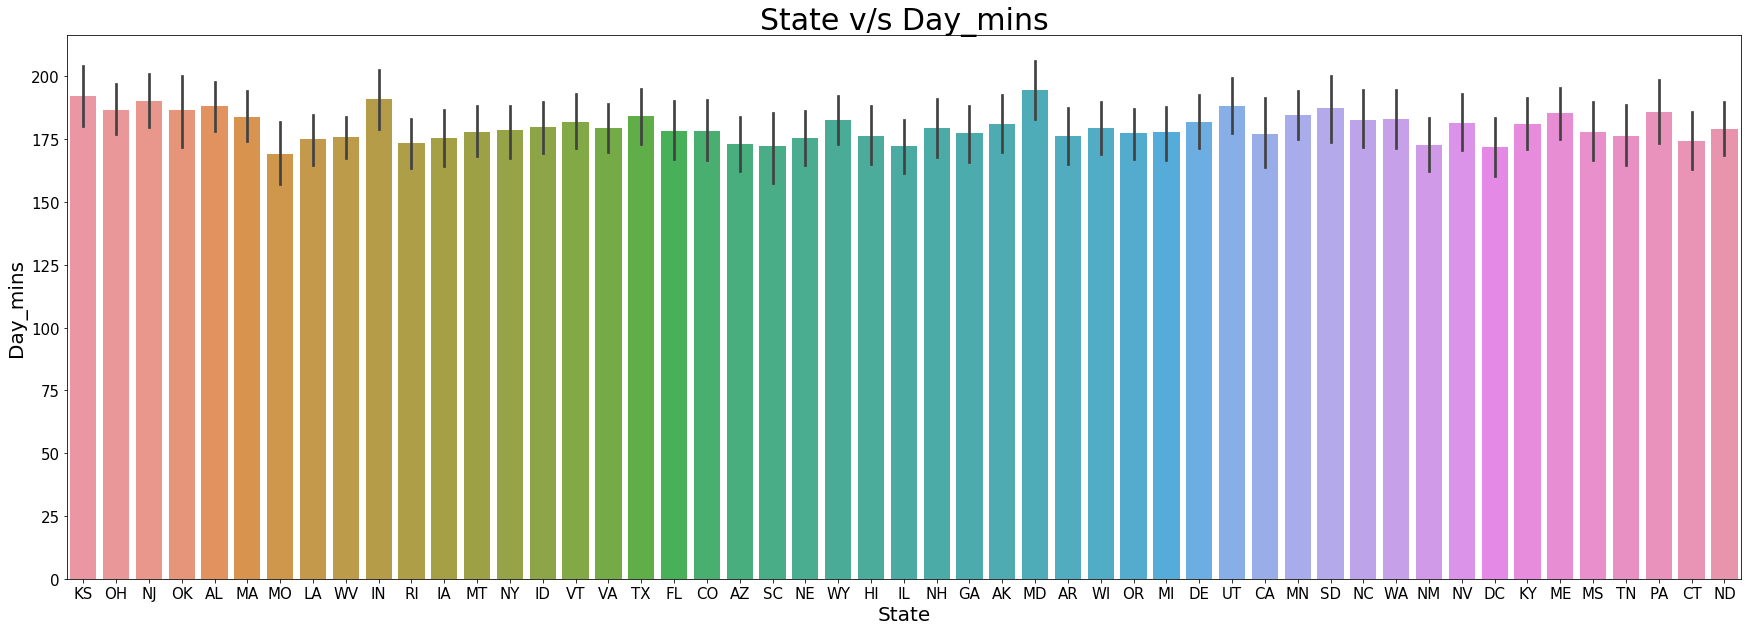

In [27]:
plt.figure(figsize=(30,10))
sns.barplot(x="State", y="Day_Mins", data=data2)
plt.title("State v/s Day_mins" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("Day_mins", fontsize = 20)
plt.yticks(size=15)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text yticklabel objects>)

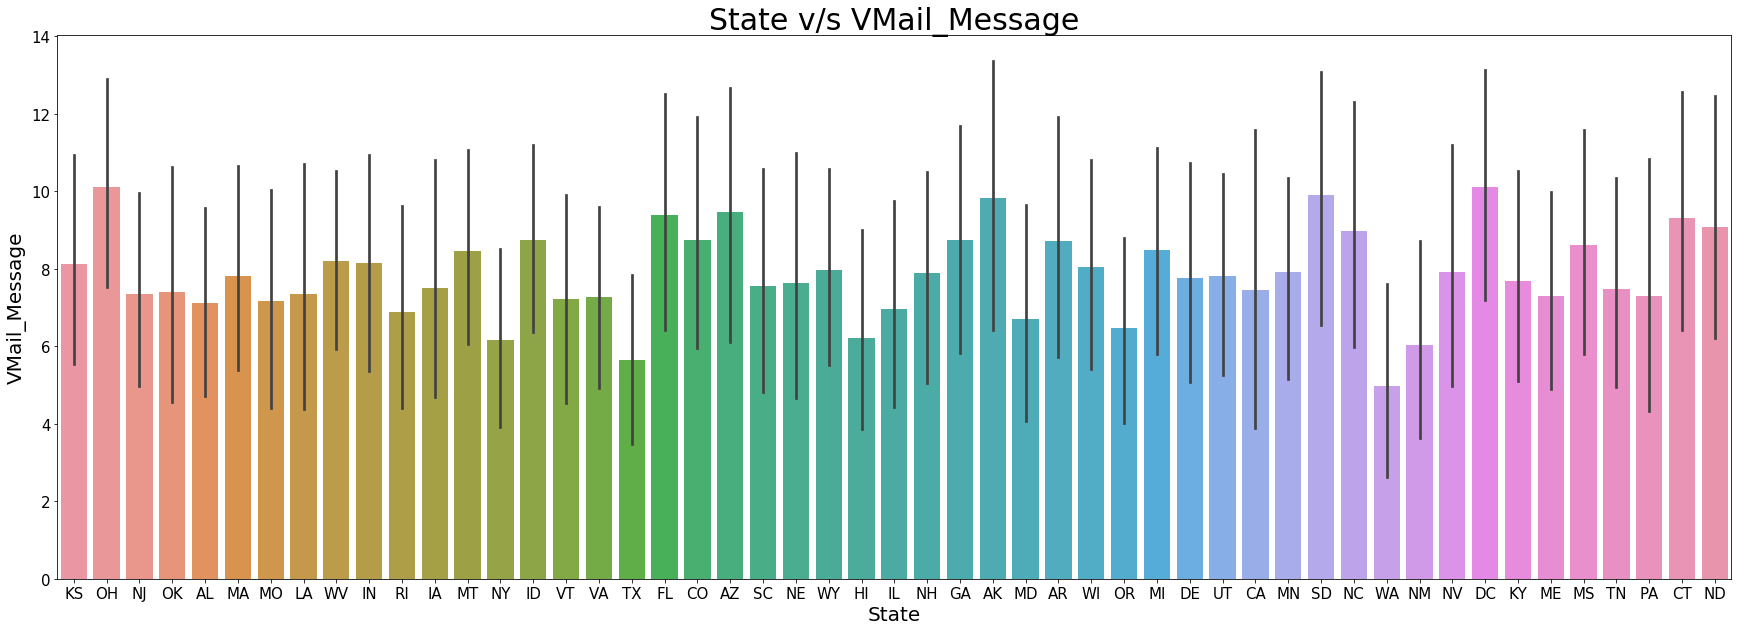

In [28]:
plt.figure(figsize=(30,10))
sns.barplot(x="State", y="VMail_Message", data=data2 )
plt.title("State v/s VMail_Message" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("VMail_Message", fontsize = 20)
plt.yticks(size=15)

(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text yticklabel objects>)

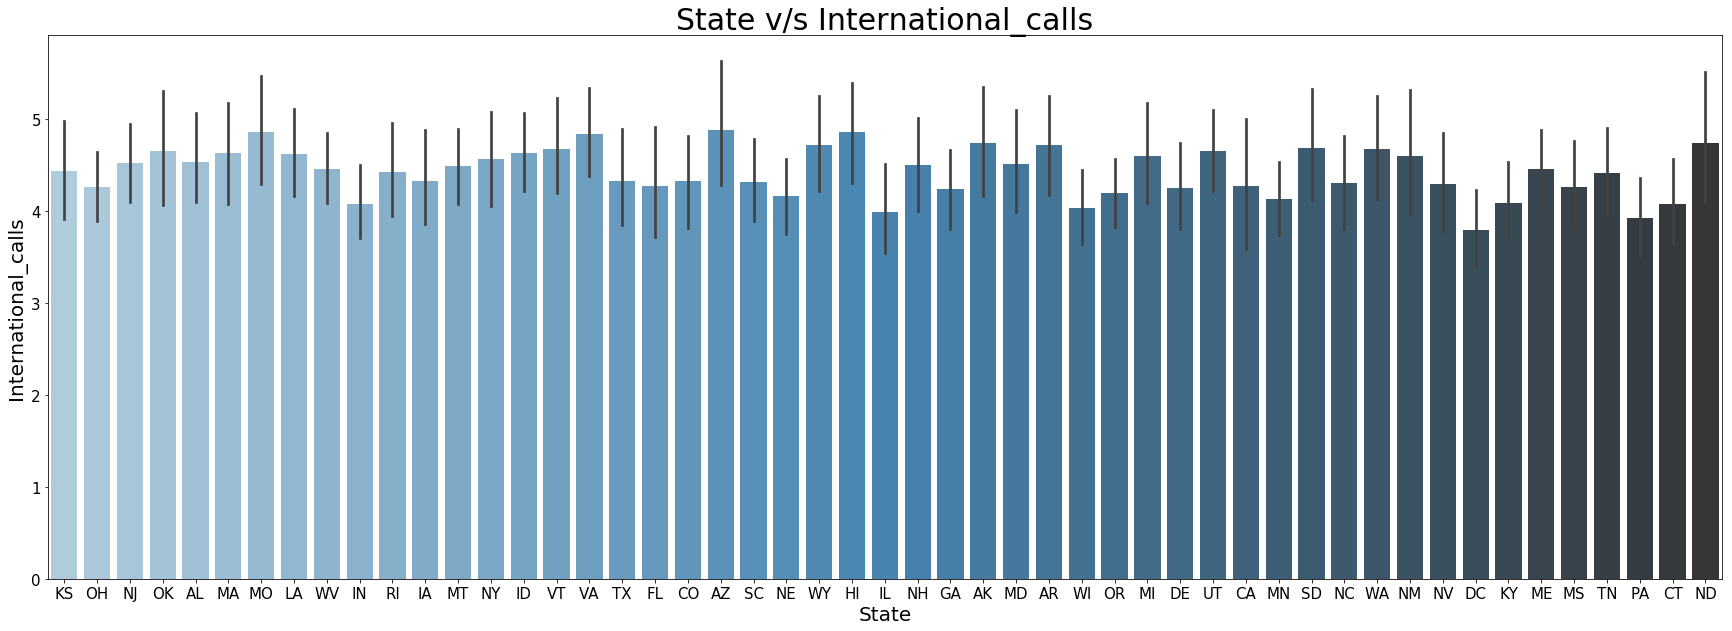

In [29]:
plt.figure(figsize=(30,10))
sns.barplot(x="State", y="International_calls", data=data2 , palette="Blues_d")
plt.title("State v/s International_calls" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("International_calls", fontsize = 20)
plt.yticks(size=15)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text yticklabel objects>)

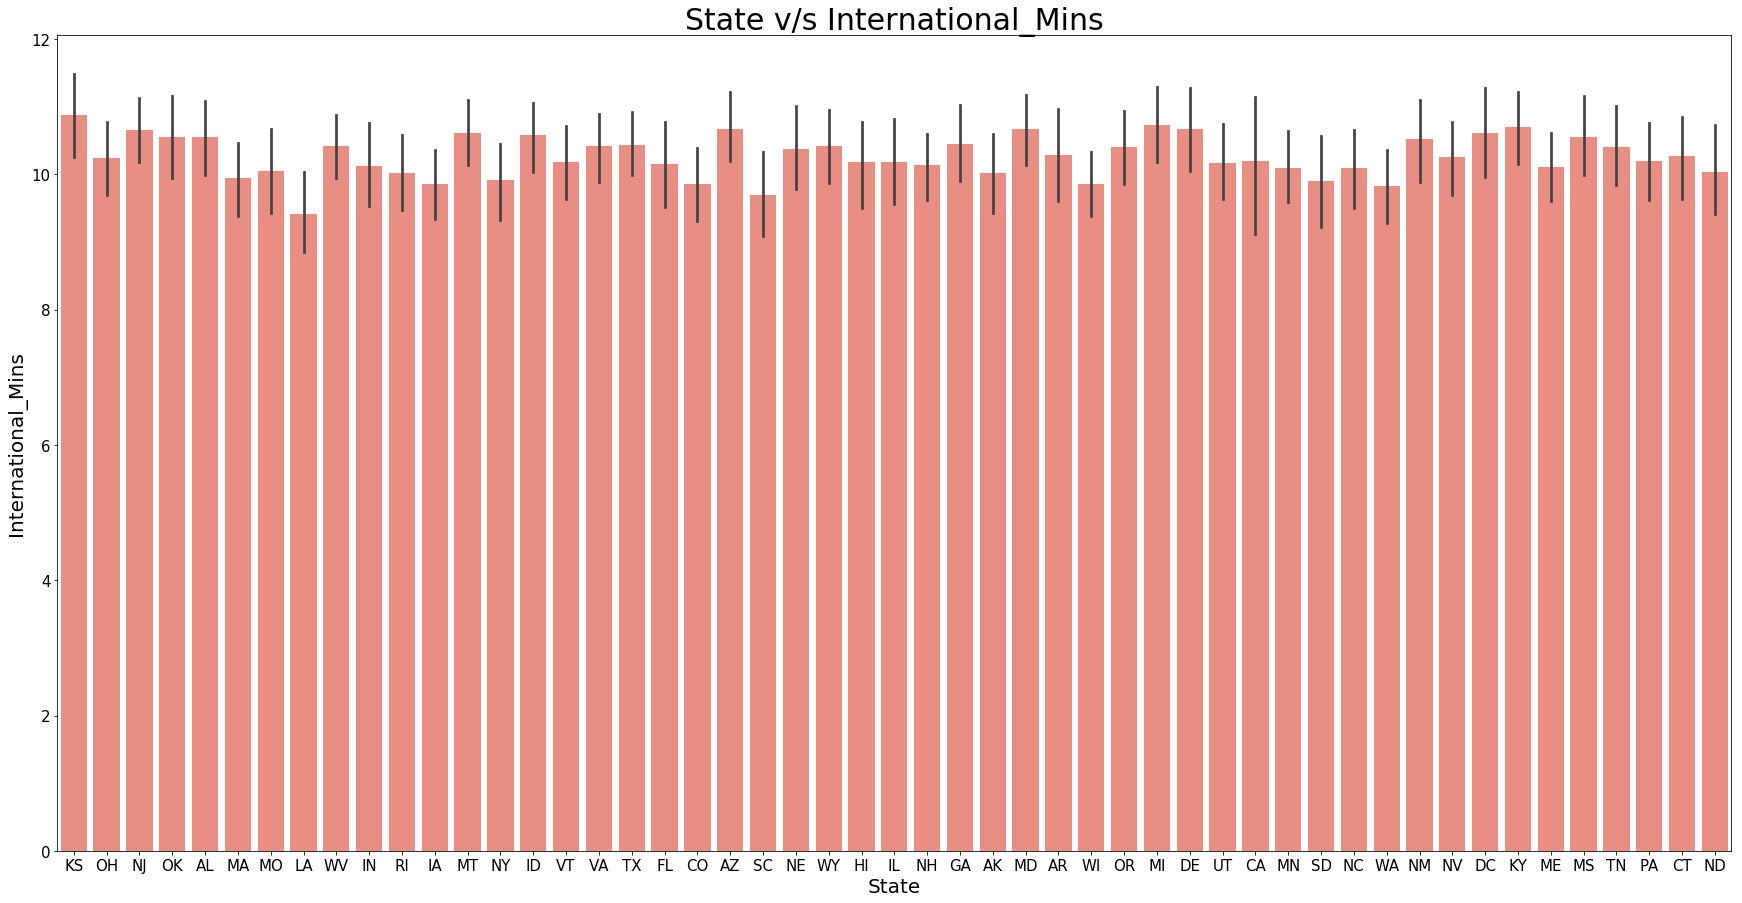

In [30]:
plt.figure(figsize=(30,15))
sns.barplot(x="State", y="International_Mins", data=data2 , color="salmon")
plt.title("State v/s International_Mins" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("International_Mins", fontsize = 20)
plt.yticks(size=15)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text yticklabel objects>)

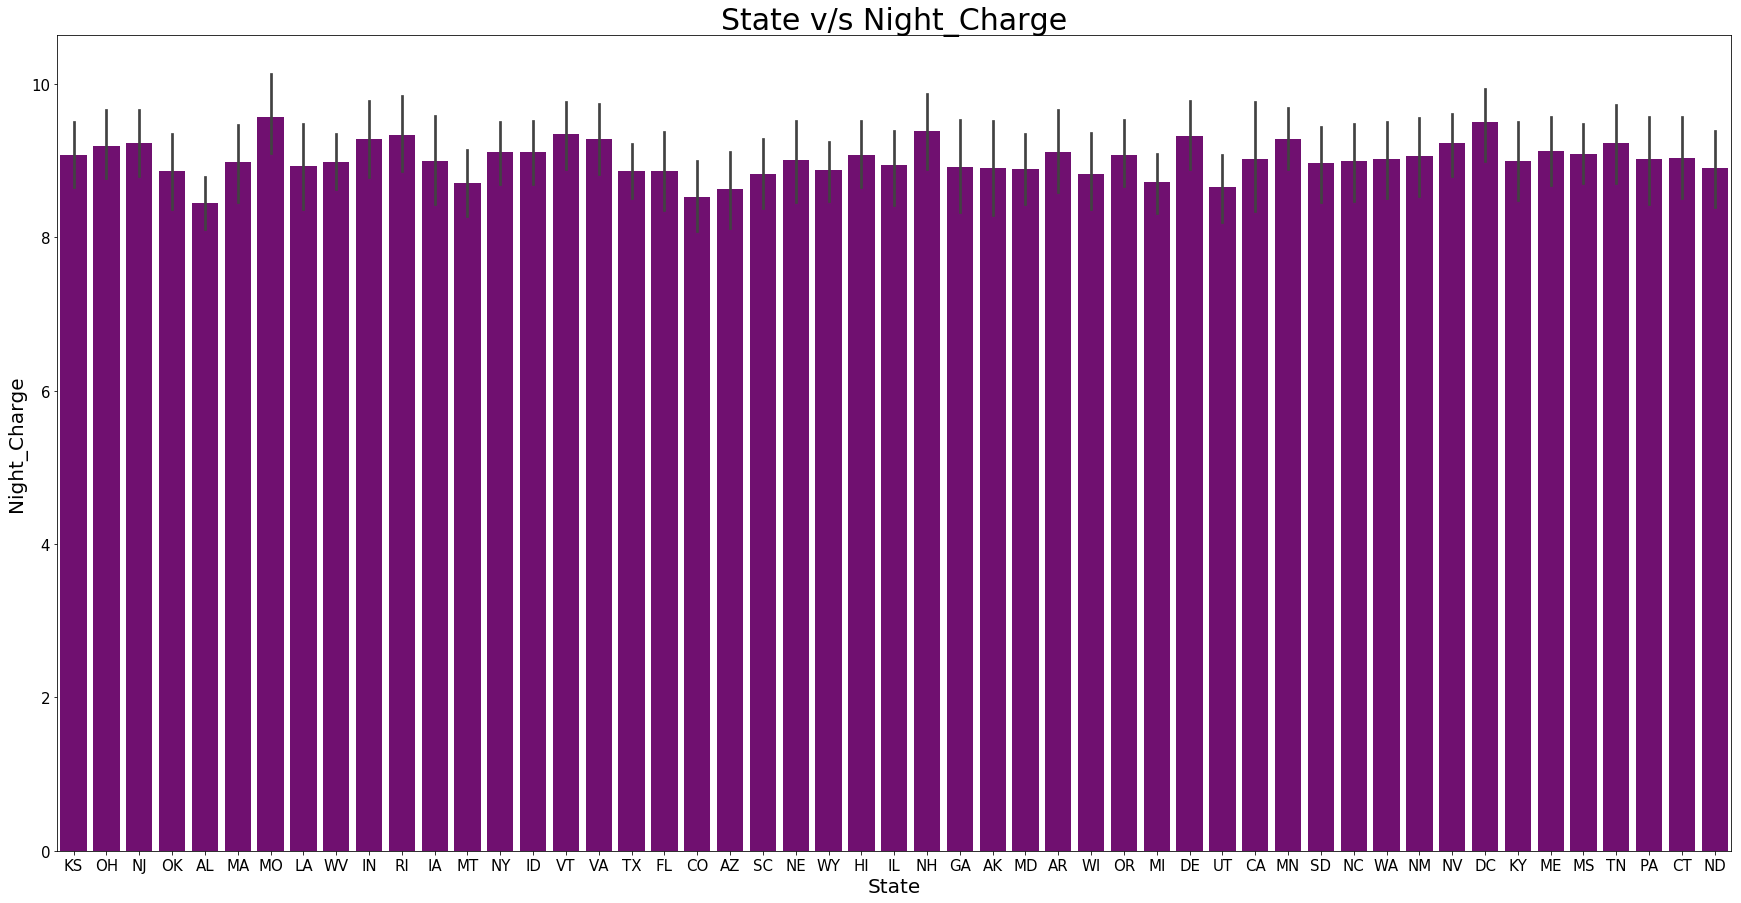

In [31]:
plt.figure(figsize=(30,15))
sns.barplot(x="State", y="Night_Charge", data=data2 , color="purple")
plt.title("State v/s Night_Charge" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("Night_Charge", fontsize = 20)
plt.yticks(size=15)

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

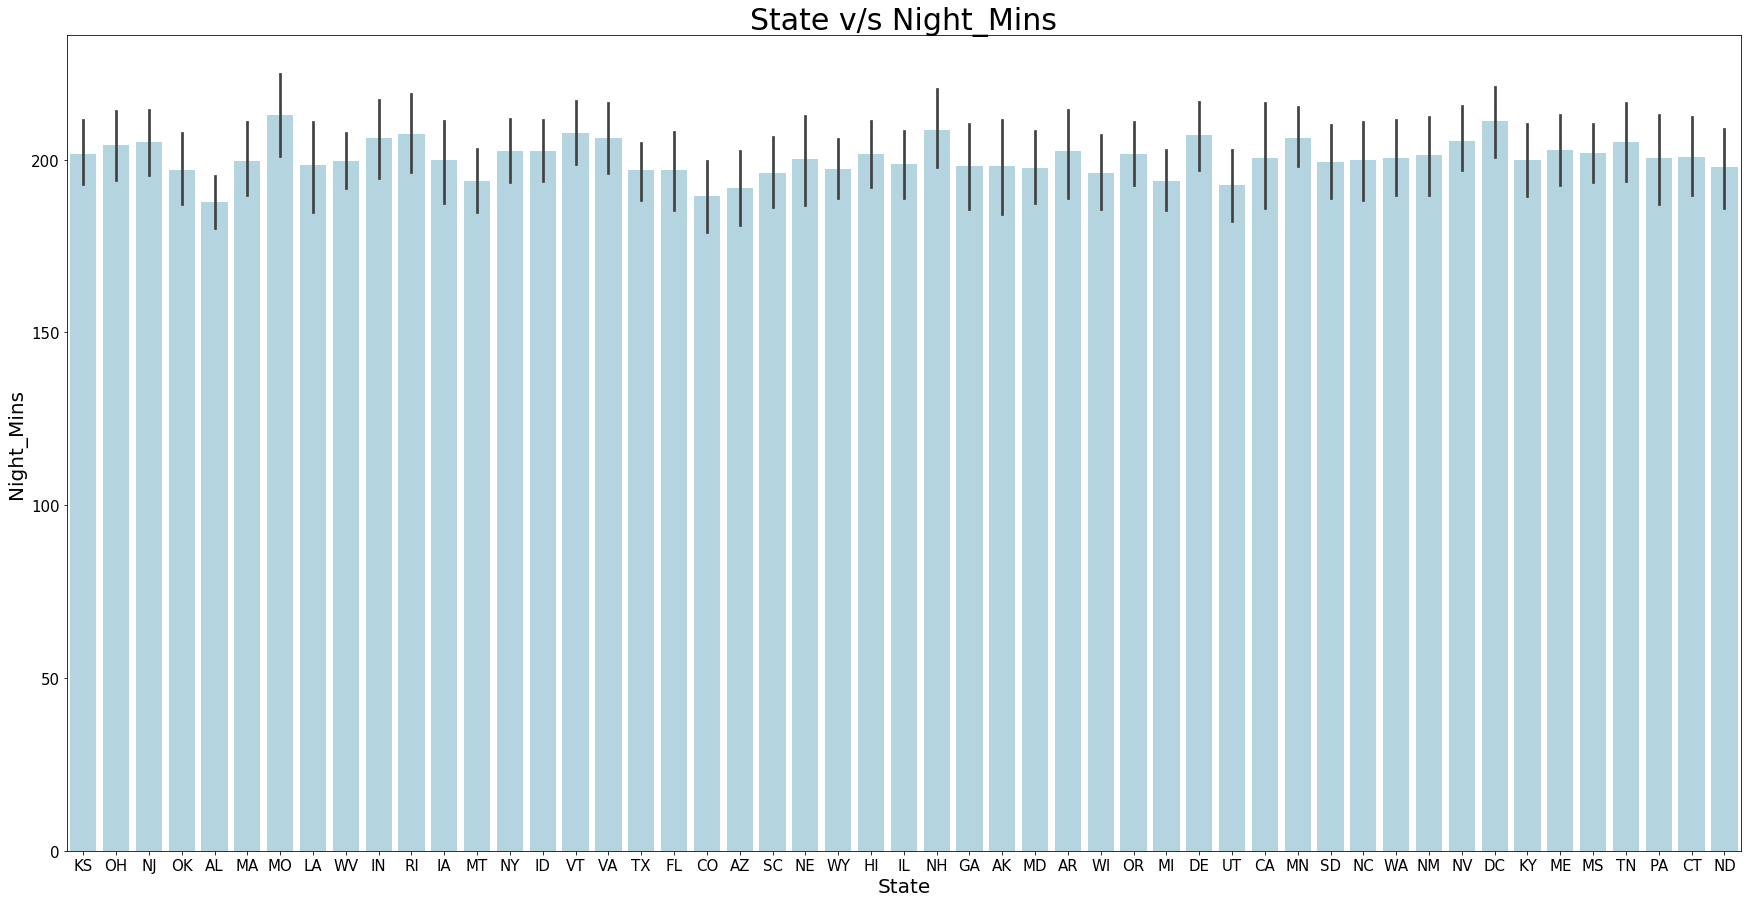

In [32]:
plt.figure(figsize=(30,15))
sns.barplot(x="State", y="Night_Mins", data=data2, color="lightblue")
plt.title("State v/s Night_Mins" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("Night_Mins", fontsize = 20)
plt.yticks(size=15)
#sns.color_palette("rocket")

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

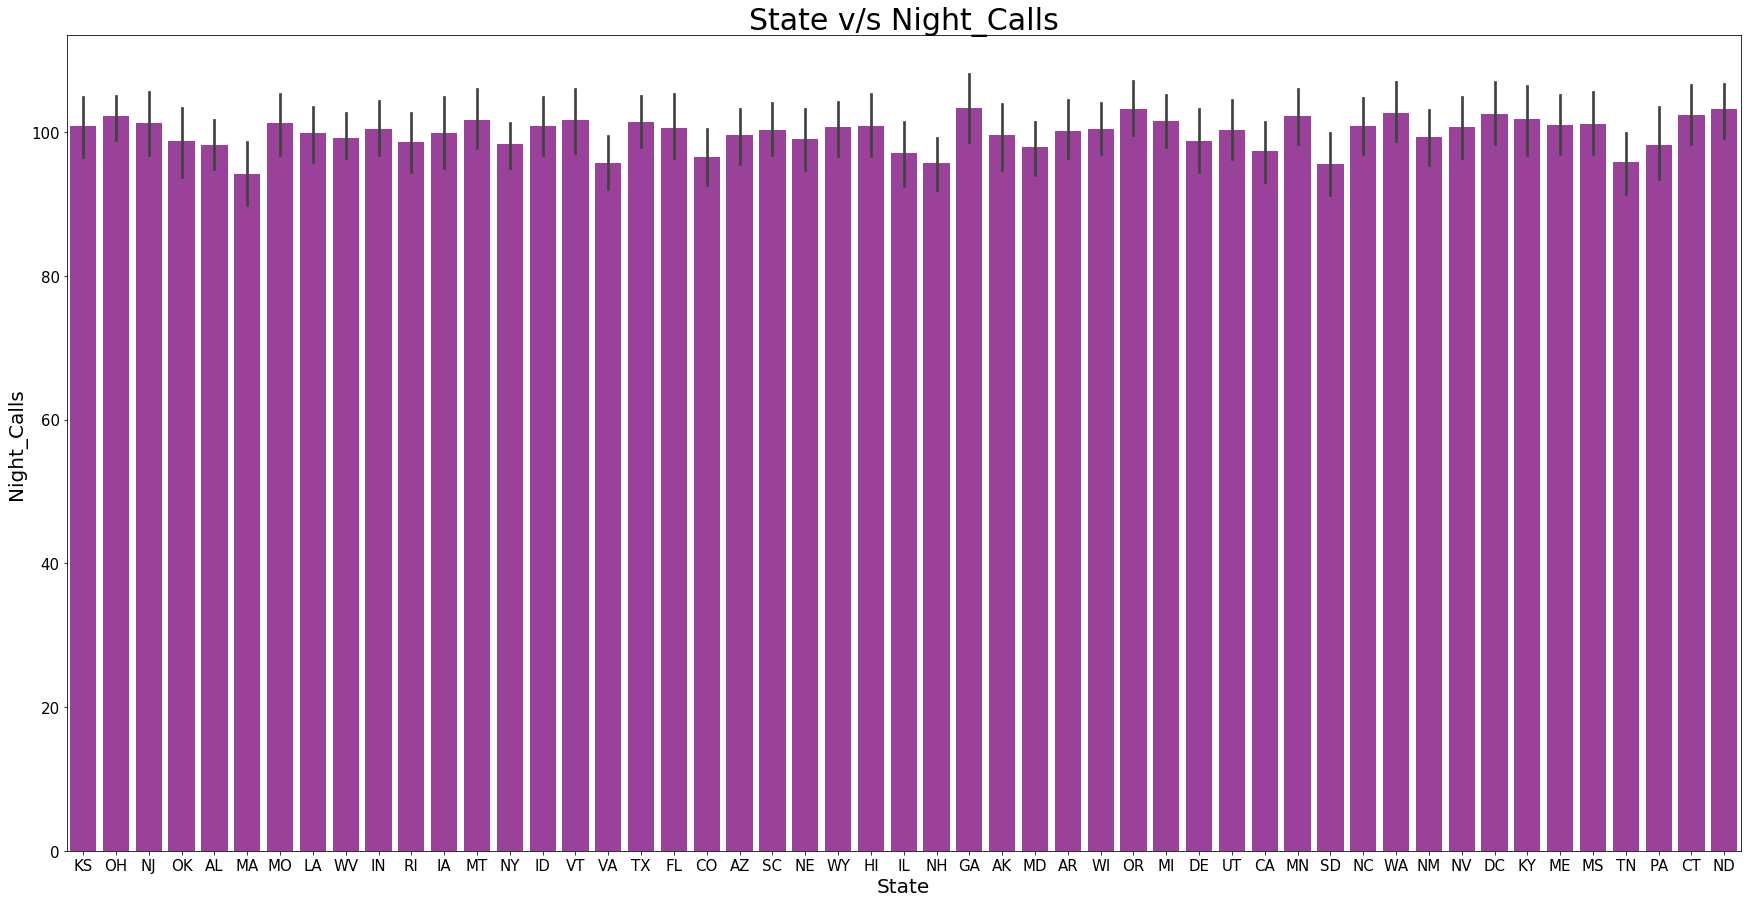

In [33]:
plt.figure(figsize=(30,15))
sns.barplot(x="State", y="Night_Calls", data=data2,color="#a834a8")
plt.title("State v/s Night_Calls" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("Night_Calls", fontsize = 20)
plt.yticks(size=15)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text yticklabel objects>)

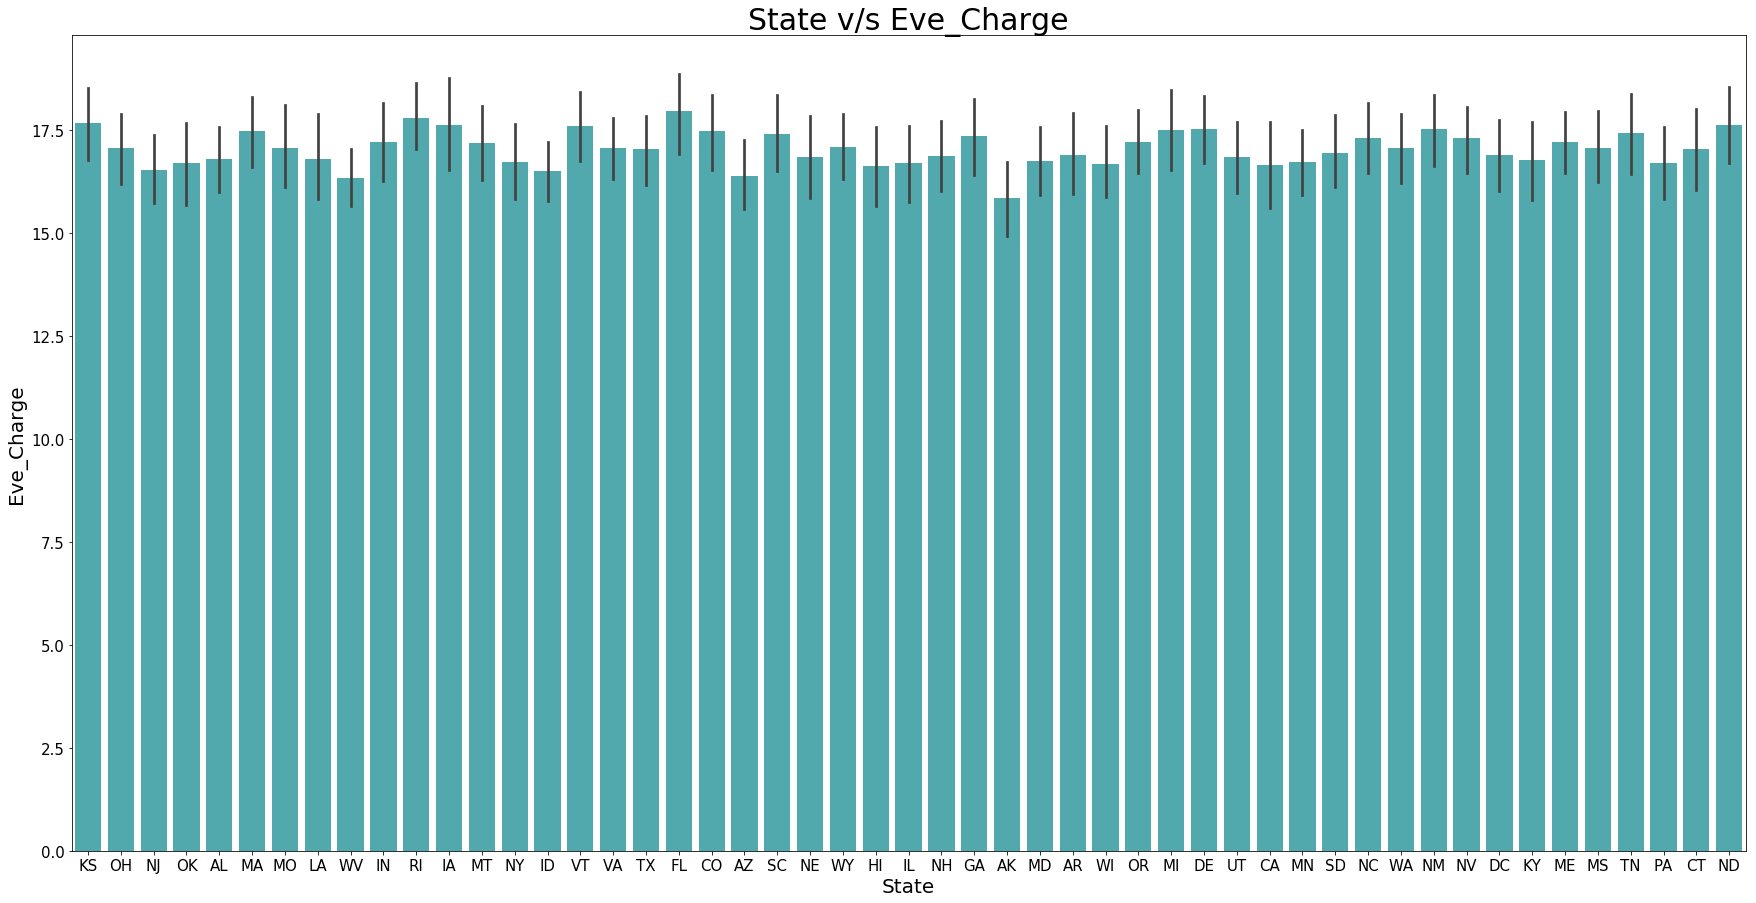

In [34]:
plt.figure(figsize=(30,15))
sns.barplot(x="State", y="Eve_Charge", data=data2 , color="#42b7bd")
plt.title("State v/s Eve_Charge" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("Eve_Charge", fontsize = 20)
plt.yticks(size=15)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

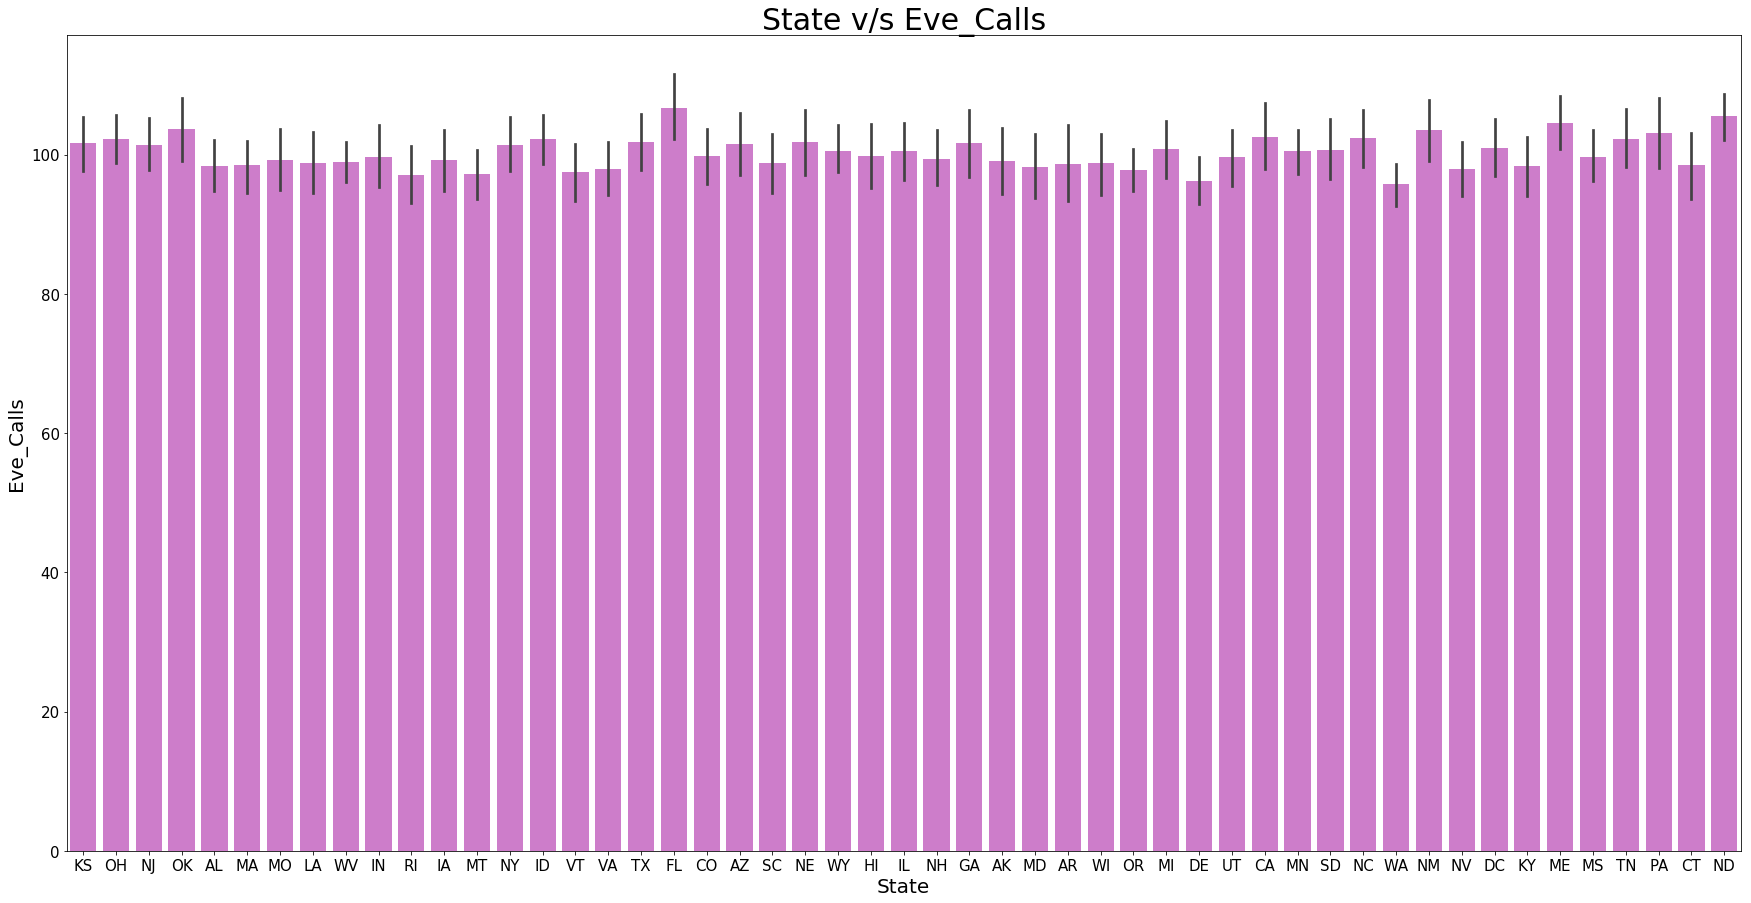

In [35]:
plt.figure(figsize=(30,15))
sns.barplot(x="State", y="Eve_Calls", data=data2 , color="orchid")
plt.title("State v/s Eve_Calls" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("Eve_Calls", fontsize = 20)
plt.yticks(size=15)

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

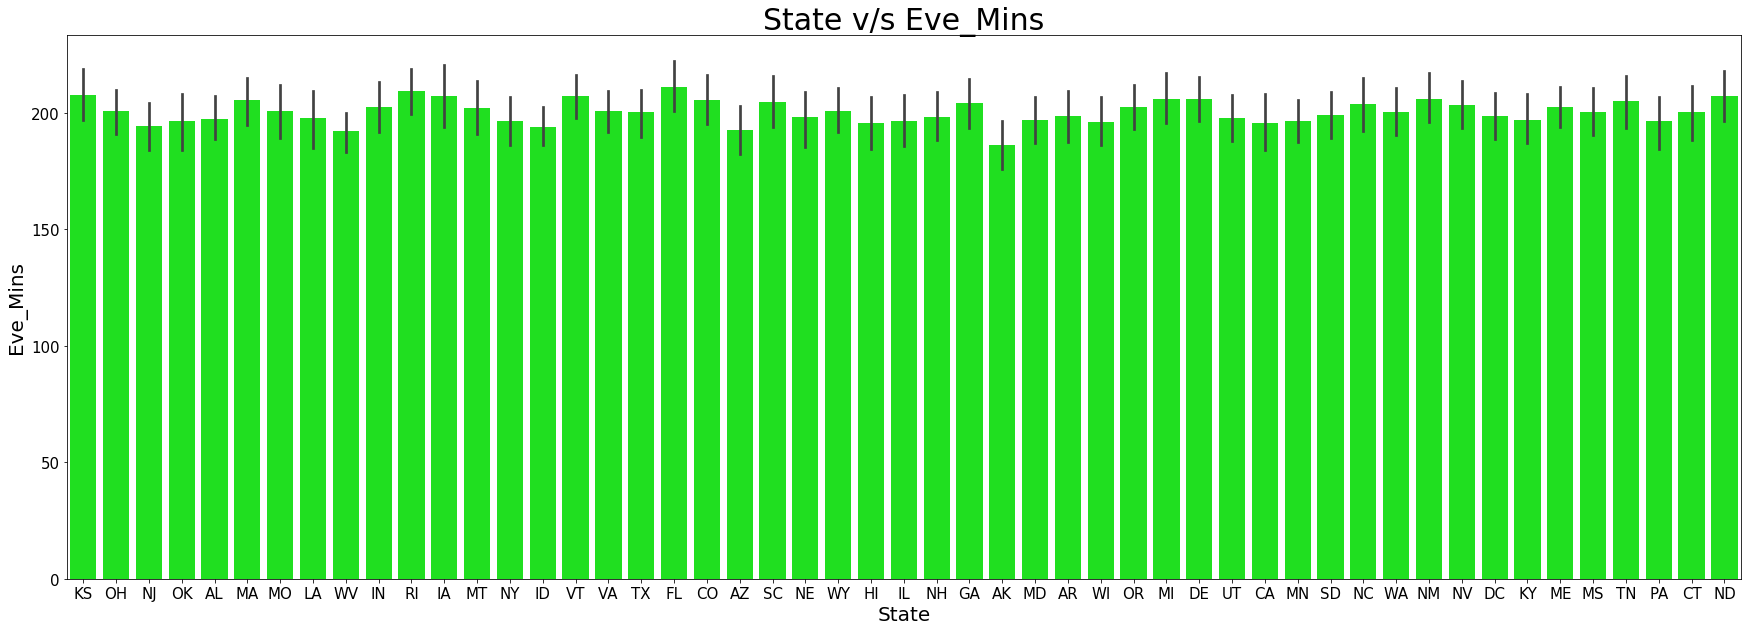

In [36]:
plt.figure(figsize=(30,10))
sns.barplot(x="State", y="Eve_Mins", data=data2, color = "lime")
plt.title("State v/s Eve_Mins" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("Eve_Mins", fontsize = 20)
plt.yticks(size=15)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text yticklabel objects>)

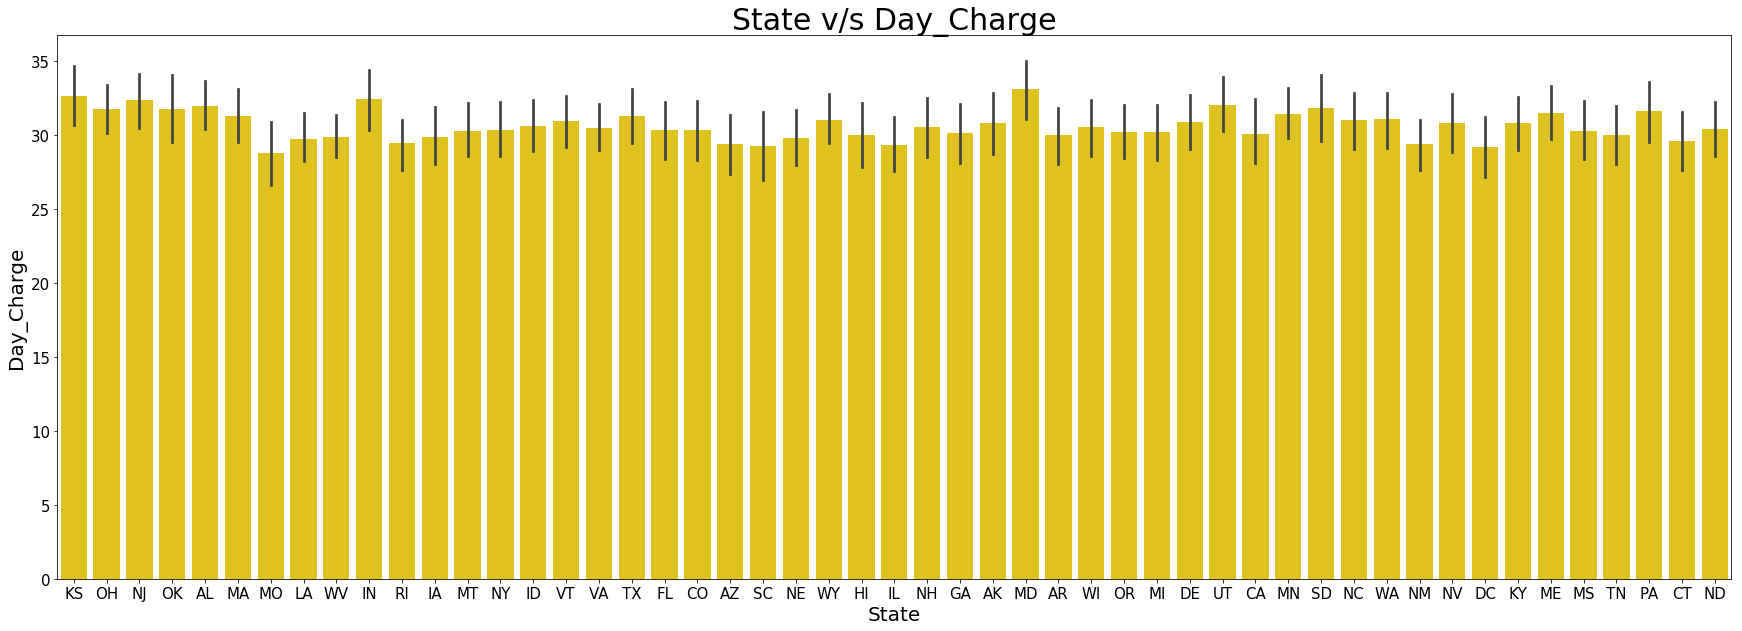

In [37]:
plt.figure(figsize=(30,10))
sns.barplot(x="State", y="Day_Charge", data=data2 , color = "gold")
plt.title("State v/s Day_Charge" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("Day_Charge", fontsize = 20)
plt.yticks(size=15)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

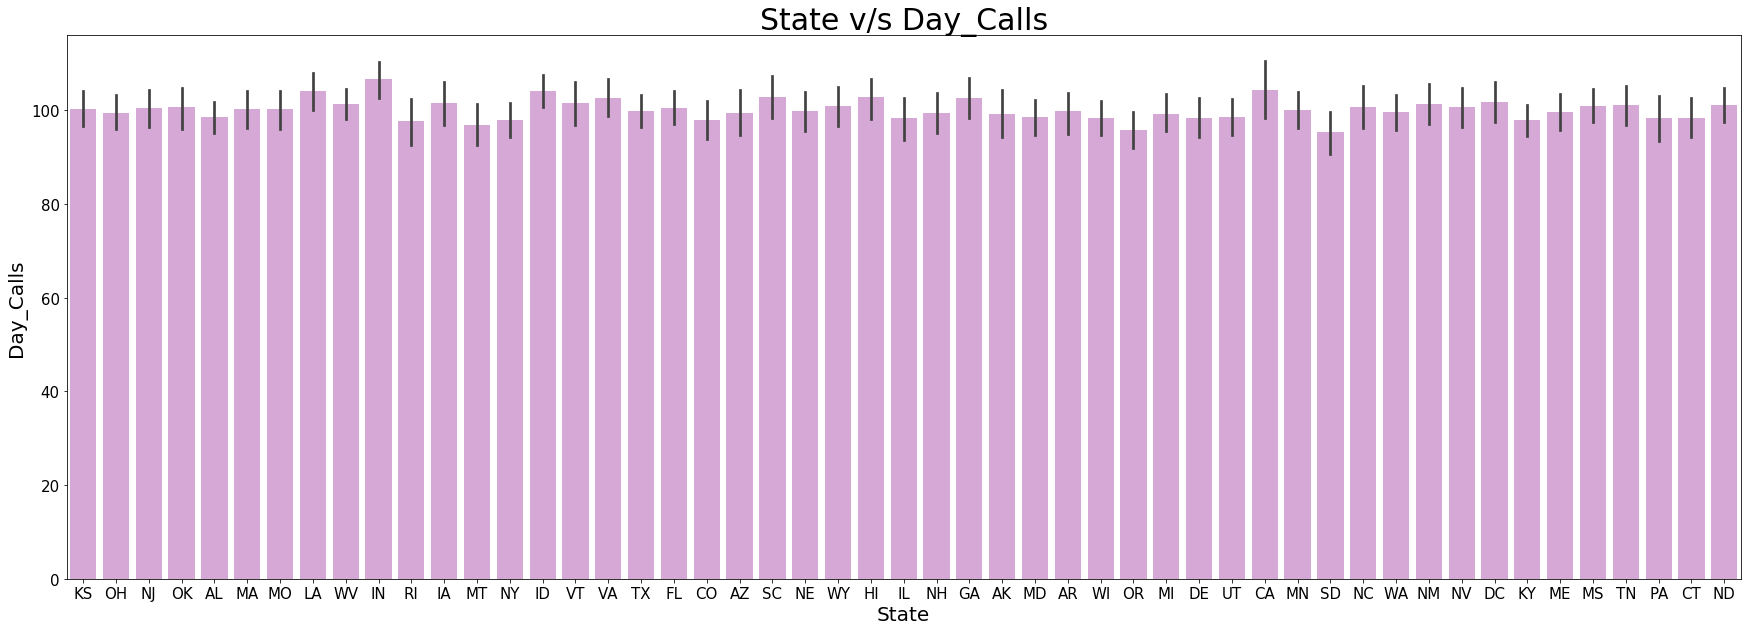

In [38]:
plt.figure(figsize=(30,10))
sns.barplot(x="State", y="Day_Calls", data=data2 , color = "plum")
plt.title("State v/s Day_Calls" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("Day_Calls", fontsize = 20)
plt.yticks(size=15)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 <a list of 8 Text yticklabel objects>)

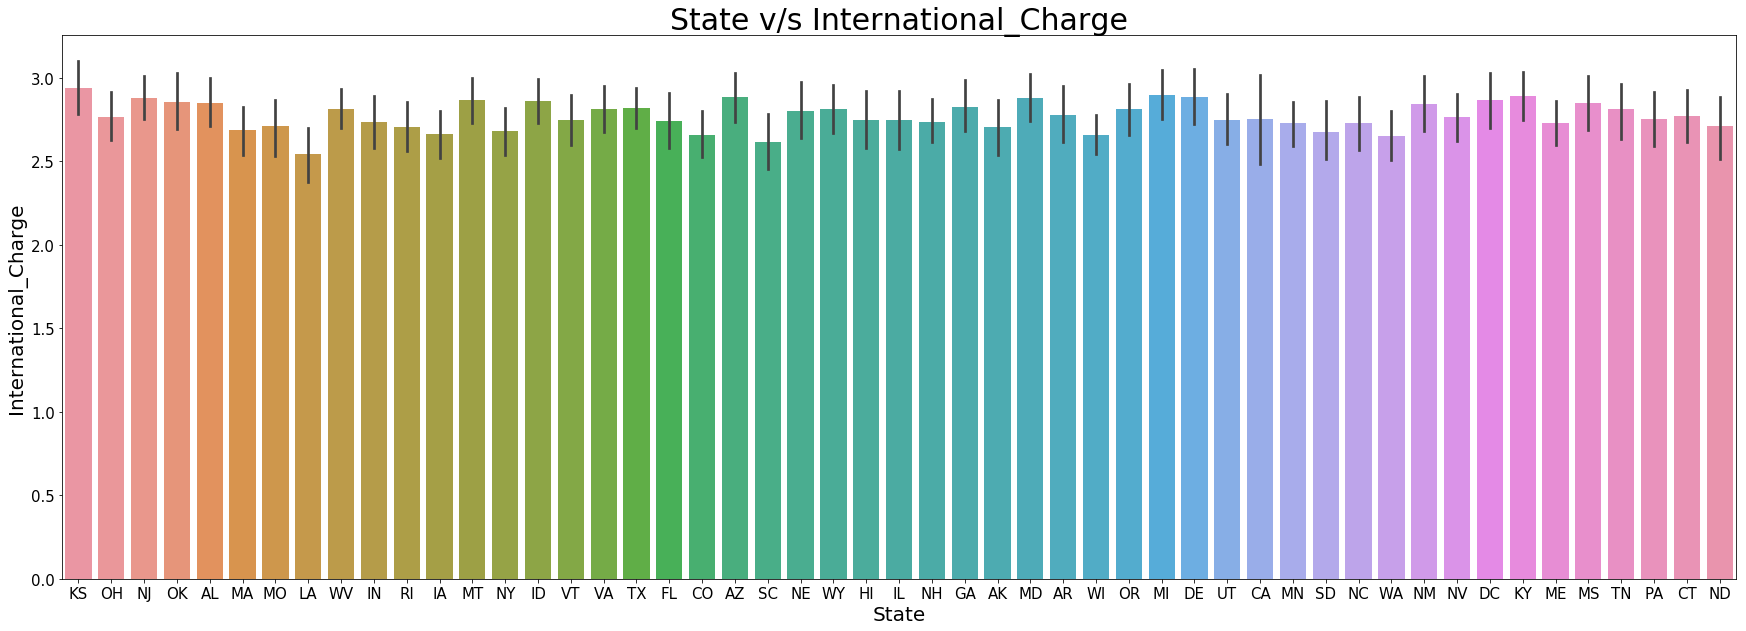

In [39]:
plt.figure(figsize=(30,10))
sns.barplot(x="State", y="International_Charge", data=data2)
plt.title("State v/s International_Charge" , fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("International_Charge", fontsize = 20)
plt.yticks(size=15)

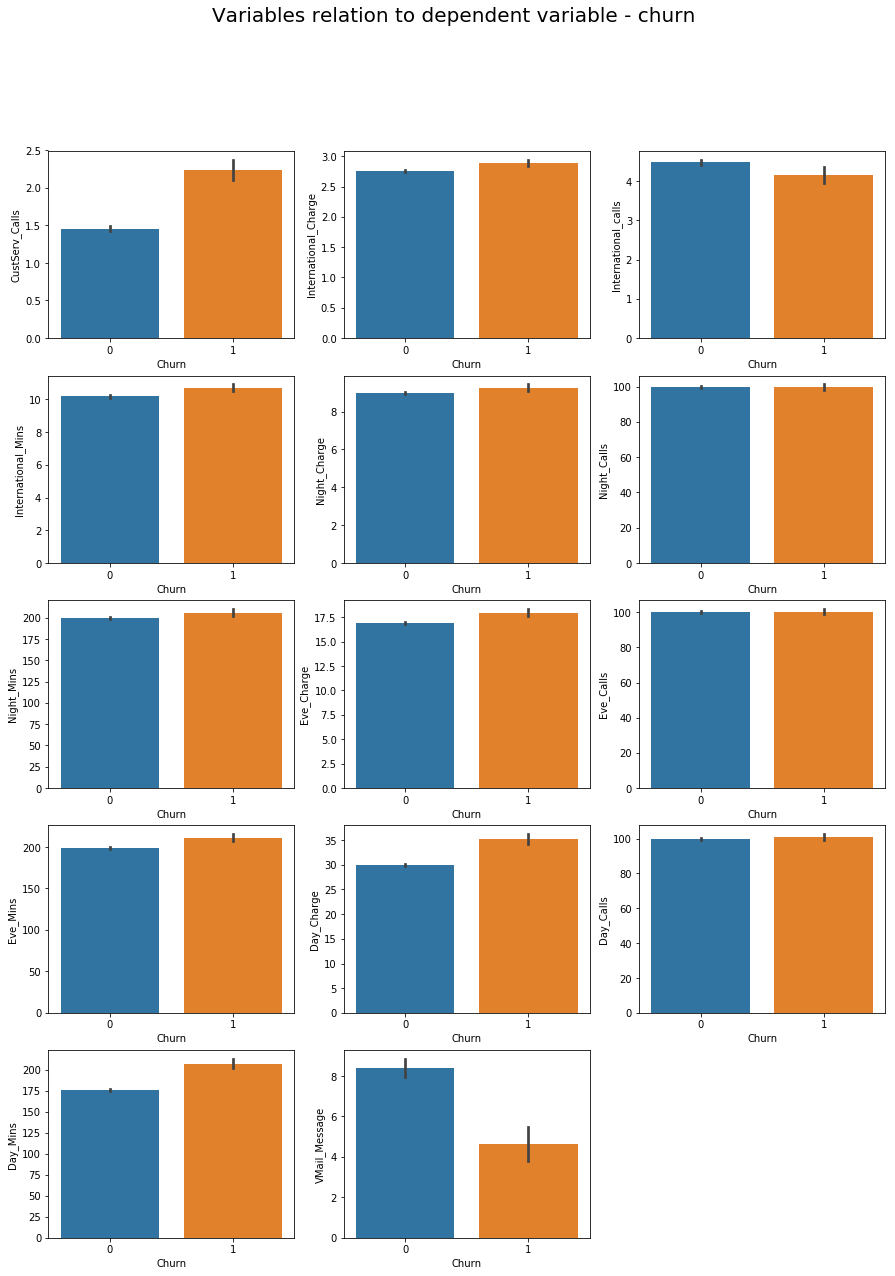

In [40]:
#ax = sns.barplot(x="State", y="Day_Min", data=data1)
plt.figure(figsize = (15,20))
plt.subplot(5,3,1)
sns.barplot(data2['Churn'], data2['CustServ_Calls'])
plt.subplot(5,3,2)
sns.barplot(data2['Churn'], data2['International_Charge'])
plt.subplot(5,3,3)
sns.barplot(data2['Churn'], data2['International_calls'])
plt.subplot(5,3,4)
sns.barplot(data2['Churn'], data2['International_Mins'])
plt.subplot(5,3,5)
sns.barplot(data2['Churn'], data2['Night_Charge'])
plt.subplot(5,3,6)
sns.barplot(data2['Churn'], data2['Night_Calls'])
plt.subplot(5,3,7)
sns.barplot(data2['Churn'], data2['Night_Mins'])
plt.subplot(5,3,8)
sns.barplot(data2['Churn'], data2['Eve_Charge'])
plt.subplot(5,3,9)
sns.barplot(data2['Churn'], data2['Eve_Calls'])
plt.subplot(5,3,10)
sns.barplot(data2['Churn'], data2['Eve_Mins'])
plt.subplot(5,3,11)
sns.barplot(data2['Churn'], data2['Day_Charge'])
plt.subplot(5,3,12)
sns.barplot(data2['Churn'], data2['Day_Calls'])
plt.subplot(5,3,13)
sns.barplot(data2['Churn'], data2['Day_Mins'])
plt.subplot(5,3,14)
sns.barplot(data2['Churn'], data2['VMail_Message'])
plt.suptitle("Variables relation to dependent variable - churn", fontsize = 20)
plt.show()


# LogisticRegression

In [41]:
data2.head(2)

,State,Account,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score

In [43]:
X=data2.loc[:,['Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Charge','Eve_Calls','Night_Mins','Night_Calls','Night_Charge','International_Mins','International_calls','International_Charge','CustServ_Calls']]
y=data2.Churn

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=13)


In [45]:
X_train.shape

(3231, 13)

In [46]:
X_test.shape

(1386, 13)

In [70]:
model = LogisticRegression()

In [71]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8935064935064935

In [72]:
y_predic=model.predict(X_train)
accuracy_score(y_train,y_predic)

0.8486424032351242

In [73]:
var = np.array(X_test.iloc[10])

print(var)

[207.6   82.    35.29 193.3   16.43 105.   149.7   68.     6.74  11.2
   6.     3.02   1.  ]


In [74]:
model.predict([var])

array([0])

In [75]:
(y_test.iloc[10])

0

In [76]:
y_test

1936    0
4129    0
1319    0
823     0
1066    0
       ..
904     1
4085    0
2549    0
1089    0
205     0
Name: Churn, Length: 1155, dtype: int32

In [77]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
confusion_matrix(y_test,y_predict)

array([[1027,    2],
       [ 121,    5]], dtype=int64)

In [79]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Churn,,
0,1027,2
1,121,5


In [80]:
pd.crosstab(y_train,y_predic)

col_0,0,1
Churn,,
0,2927,5
1,519,11


# XGBClassifier

In [57]:
from xgboost import XGBClassifier

In [58]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,random_state=13)


In [59]:
model=XGBClassifier(learning_rate=0.7,n_estimators=250,random_state=10)

In [60]:
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9090909090909091

In [61]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Churn,,
0,981,48
1,57,69


# RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [63]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,random_state=13)

In [64]:
model=RandomForestClassifier(n_estimators=22,random_state=7)

In [65]:
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.922077922077922

In [66]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 1029, 1: 126})


col_0,0,1
Churn,,
0,999,30
1,60,66


In [67]:
model.score(X_train,y_train)

0.9971114962449451

In [68]:
model.score(X_test,y_test)

0.922077922077922

# Conclusion

## From above it is clear that, The main variables that are influencing the customers to migrate
1. Voice Mail Messages and plan
2. Customer Service Calls

## Few steps to help reduce churn
1. Give Special Discount to customer according to their usage
2. Concentrate on the particular states which are influencing more churn
3. Speak to customers to fulfil their desires and to improve customer service calls.

# THANK YOU